<a href="https://colab.research.google.com/github/mifm/examples/blob/master/estimating_speedups_from_weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

  Cloning https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git to /tmp/pip-req-build-djkklwhu
  Running command git clone -q https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git /tmp/pip-req-build-djkklwhu
  Created wheel for py-wake: filename=py_wake-2.2.0-py3-none-any.whl size=24776475 sha256=272426f0a3f552db5277ca5f9bedd4cd07501fb5d5a5fe72bbf7466f85016e8d
  Stored in directory: /tmp/pip-ephem-wheel-cache-p10bfrbm/wheels/fb/b1/5a/9b9114aac7776bf9de40facb8a0f958449e0a2082c955ca29e
Successfully built py-wake


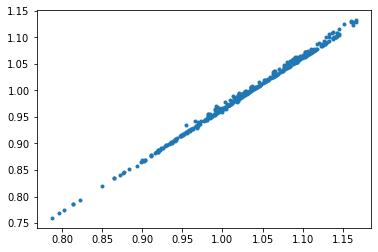

In [3]:
from py_wake.examples.data.ParqueFicticio._parque_ficticio import ParqueFicticioSite
import numpy as np
from numpy import newaxis as na
import matplotlib.pyplot as plt

site = ParqueFicticioSite()
def ws_from_cdf(cdf, A, k):
    return A * (-np.log(1- cdf)) ** (1 / k)

A = site.ds.Weibull_A.values
k = site.ds.Weibull_k.values
shape = A.shape

cdfs = np.linspace(0, 0.99999999)
cdfs = np.broadcast_to(cdfs[:, na, na, na, na],  cdfs.shape + shape)

A = np.broadcast_to(A[na, ...], cdfs.shape)
k = np.broadcast_to(k[na, ...], cdfs.shape)

wsp = ws_from_cdf(cdfs, A, k)

one_wsp = 8


index = int(np.round(np.interp(one_wsp, wsp.mean((1,2))[:, 1,0], np.arange(50)),0))

speedups = wsp[index,:,:,1,0] / one_wsp

plt.plot(site.ds.Speedup.values[:,:,1,0].ravel(), speedups.ravel(), '.')